# Is Countsort really linear? (Yes!) Let's see.

See `plot_stats.ipynb`.

To save time, this loops over trials using the Rust builtin function.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm # optional, for plotting progress

from countsortmodule import countsort_trials_python

In [2]:
Ns = np.array([2**ii for ii in range(4,21)])
Ws = np.array(list(range(8,25, 4)))
T = 36

In [3]:
# Run our experiments here.
# Results are measured in nanoseconds

results = np.array(
    [
        [
            countsort_trials_python(n, w, T)
            for w in Ws
        ]
        for n in tqdm(Ns)
    ]
)


100%|███████████████████████████████████████████████████████████████████████████████████| 17/17 [00:23<00:00,  1.41s/it]


In [4]:
assert results.shape == (len(Ns), len(Ws))
print(results.shape)

(17, 5)


In [5]:
np.save("results_2.npy", results)

## 2. Plot results

Let's plot, for each w, average runtime against w. We should expect:

    - A linear relation between n and runtime.
    - A linear relation between w and runtime.

This will become even more evident when we plot on a log curve.

In [6]:
results = np.load("results_2.npy")

In [7]:
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 200

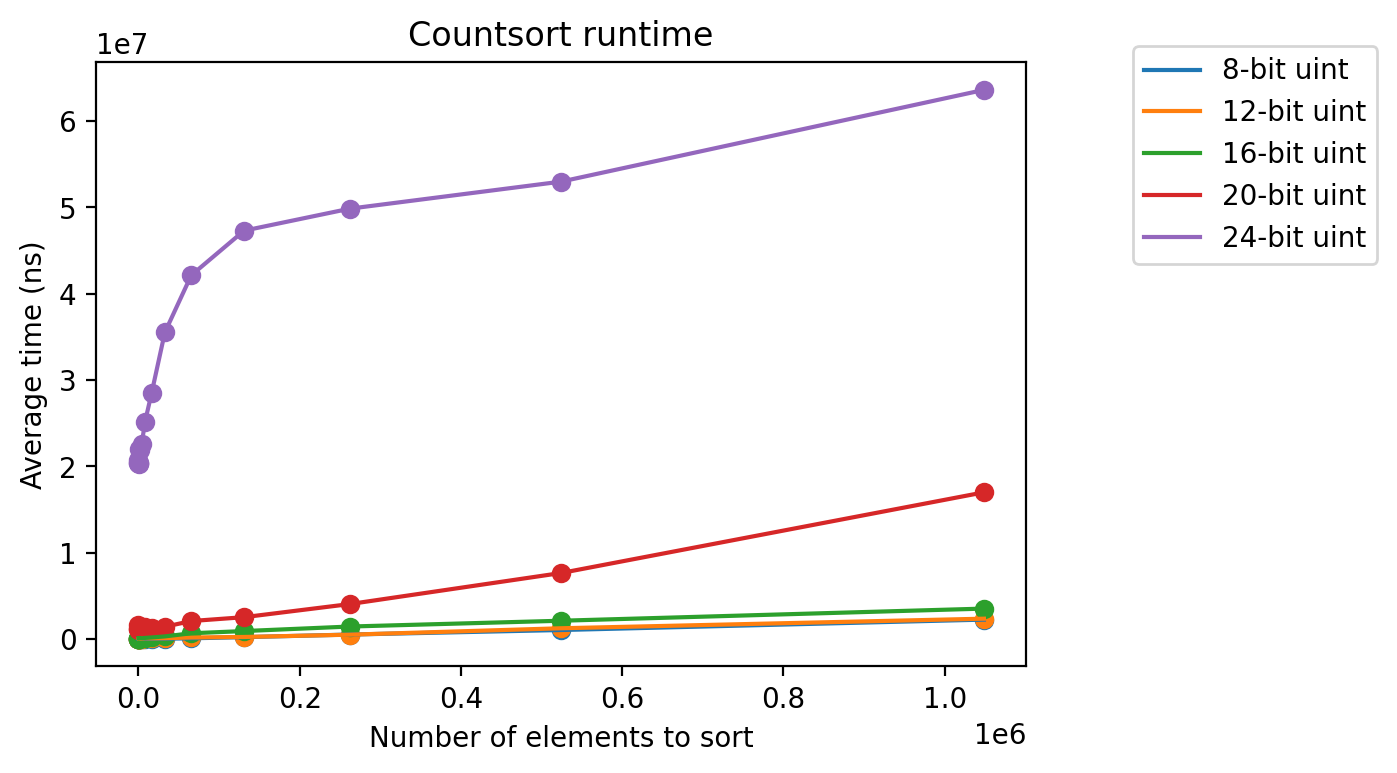

In [8]:
# Let's look at a normal sort
for ii in range(len(Ws)):
    plt.scatter(Ns, results[:, ii])
    plt.plot(Ns, results[:, ii])

plt.xlabel("Number of elements to sort")
plt.ylabel("Average time (ns)")

plt.title("Countsort runtime")
plt.legend([f"{w}-bit uint" for w in Ws], bbox_to_anchor=(1.1, 1.05))

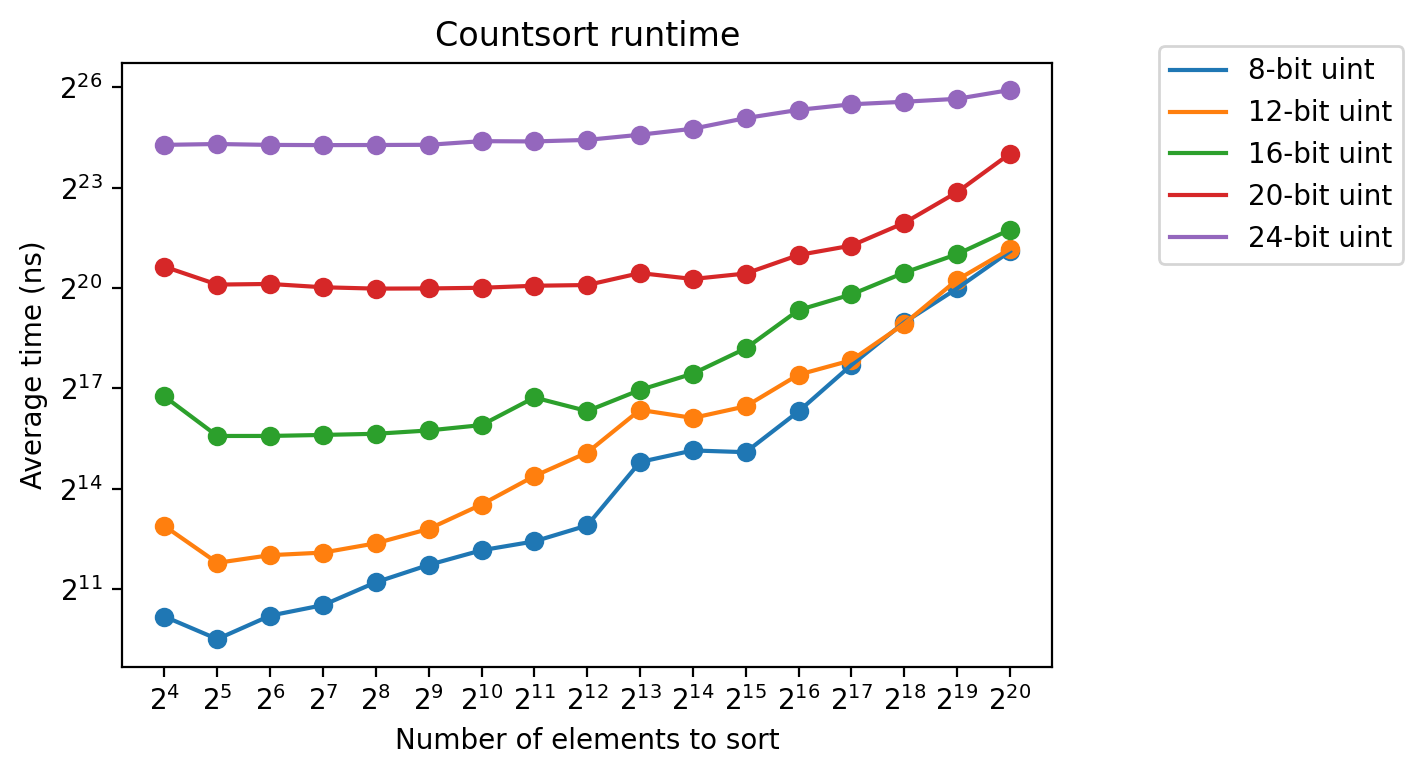

In [9]:
# Let's look at the log range
for ii in range(len(Ws)):
    plt.scatter(Ns, results[:, ii])
    plt.plot(Ns, results[:, ii])

plt.yscale('log', base=2)
plt.xscale('log', base=2)

plt.xlabel("Number of elements to sort")
plt.ylabel("Average time (ns)")
plt.xticks(Ns)

plt.title("Countsort runtime")
plt.legend([f"{w}-bit uint" for w in Ws], bbox_to_anchor=(1.1, 1.05))